# Emojis Visualizations - General Covid-19 dataset

We've used the following packages:

In [ ]:
import pandas as pd
import numpy as np
import json
import itertools  
from collections import Counter
import altair as alt
import demoji

#demoji.download_codes()

To read the JSON file that has all the tweets, it is necessary to do:

In [ ]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

We're interested in the "full_text" field:

In [ ]:
index= 0
emos = []
for element in data:
    em = demoji.findall_list(data[index]['full_text'], False)
    emos.append(em)
    index= index+1

We have calculated the frequency distribution, displayed in the form of a bar chart showing the 10 most frequent emojis within the dataset:

In [ ]:
merged=list(itertools.chain.from_iterable(emos))
c = Counter(merged)

df = pd.DataFrame.from_dict(c, orient='index').reset_index()
df = df.rename(columns={'index':'Emoji', 0:'Count'})

#range=['#fee1cc','#ffa666','#ff8933','#ff6b00','#cc5600','#994000','#662b00']

chart = alt.Chart(
    df
).mark_bar().encode(
    x=alt.X('Count:Q'),
    y=alt.Y('Emoji:N',sort='-x'),
    color=alt.Color('Count:Q',scale=alt.Scale(scheme="bluegreen")),
    tooltip=[
        alt.Tooltip('Emoji:N', title='Emoji'),
        alt.Tooltip('Count:Q', title='Tweet count')
    ]
).transform_window(
    rank='rank(Count)',
    sort=[alt.SortField('Count', order='descending')]
).transform_filter(
    (alt.datum.rank <= 10)
).properties(
    width=700,
    height=300, 
    title = "The 10 most frequent emojis in the dataset"
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=20,
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
)

chart

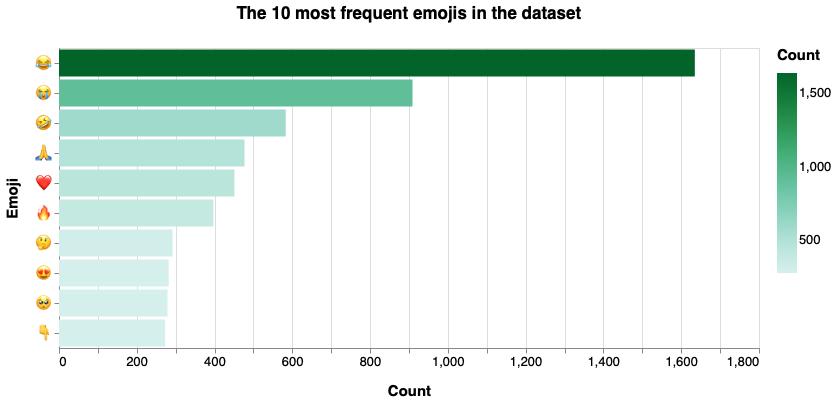